In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


In [2]:
df = pd.read_csv('C:/Users/nguye/Documents/traffic-situation-prediction/data/TrafficTwoMonth.csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


In [4]:
#chọn các cột đặc trưng và nhãn
X = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']]
Y = df[['Traffic Situation']]

In [5]:
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y.values.ravel())  # Chuyển nhãn thành số


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#phân chia dữ liệu
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_encoded, test_size=0.3, random_state=42)
#kiểm tra kích thước dữ liệu
print(f"Kích thước tập huấn luyện:{X_train.shape}")
print(f"Kích thước tập kiểm tra: {X_test.shape}")

Kích thước tập huấn luyện:(4166, 5)
Kích thước tập kiểm tra: (1786, 5)


In [7]:
#in ra các nhãn ban đầu và nhãn đã được mã hóa
print("Nhãn ban đầu và giá trị đã mã hóa:")
for i, class_label in enumerate(label_encoder.classes_):
    print(f"{class_label}:{i}")

Nhãn ban đầu và giá trị đã mã hóa:
heavy:0
high:1
low:2
normal:3


In [8]:
# Khởi tạo mô hình ANN
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),  # Lớp đầu vào với 16 neuron
    Dense(8, activation='relu'),  # Lớp ẩn với 8 neuron
    Dense(len(label_encoder.classes_), activation='softmax')  # Lớp đầu ra với số lượng class
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Tóm tắt mô hình
model.summary()

c:\Users\nguye\Documents\traffic-situation-prediction\venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 268 (1.05 KB)

 Trainable params: 268 (1.05 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Huấn luyện mô hình
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5735 - loss: 1.1729 - val_accuracy: 0.7686 - val_loss: 1.0481
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8148 - loss: 0.8666 - val_accuracy: 0.8573 - val_loss: 0.6448
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8673 - loss: 0.5220 - val_accuracy: 0.8801 - val_loss: 0.4520
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8848 - loss: 0.4109 - val_accuracy: 0.8801 - val_loss: 0.3849
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8902 - loss: 0.3544 - val_accuracy: 0.8885 - val_loss: 0.3429
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8971 - loss: 0.3155 - val_accuracy: 0.8777 - val_loss: 0.3211
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9007 - loss: 0.2870 - val_accuracy: 0.8861 - val_loss: 0.2979
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9061 - loss: 0.2652 - val_accuracy: 0.

In [10]:
# Đánh giá trên tập huấn luyện
train_accuracy = model.evaluate(X_train, Y_train, verbose=0)[1]

# Đánh giá trên tập kiểm tra
test_accuracy = model.evaluate(X_test, Y_test, verbose=0)[1]

print(f"Độ chính xác trên tập huấn luyện: {train_accuracy * 100:.2f}%")
print(f"Độ chính xác trên tập kiểm tra: {test_accuracy * 100:.2f}%")


Độ chính xác trên tập huấn luyện: 96.14%
Độ chính xác trên tập kiểm tra: 95.86%


In [11]:
# Dự đoán trên tập kiểm tra
Y_pred = np.argmax(model.predict(X_test), axis=1)

# Báo cáo
print("Classification Report:")
print(classification_report(Y_test, Y_pred, target_names=label_encoder.classes_))

# Ma trận nhầm lẫn
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Classification Report:
              precision    recall  f1-score   support

       heavy       0.94      0.99      0.96       333
        high       0.86      0.73      0.79       122
         low       0.97      0.96      0.96       217
      normal       0.97      0.97      0.97      1114

    accuracy                           0.96      1786
   macro avg       0.93      0.91      0.92      1786
weighted avg       0.96      0.96      0.96      1786

Confusion Matrix:
[[ 330    3    0    0]
 [  10   89    0   23]
 [   1    0  208    8]
 [  10   12    7 1085]]


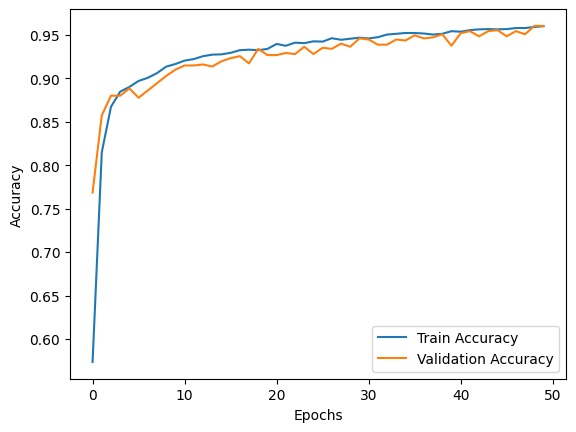

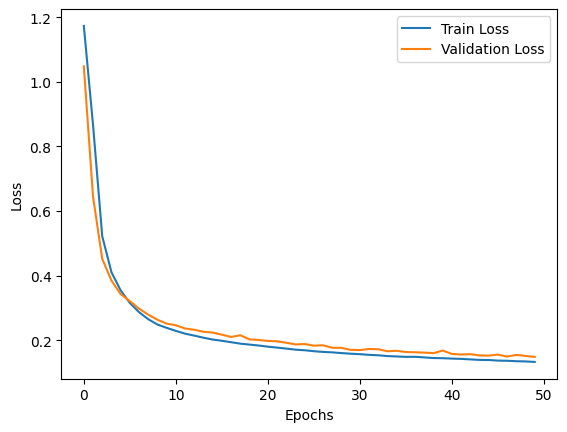

In [12]:
# Trực quan hóa độ chính xác
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Trực quan hóa hàm loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()